In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import yfinance as yf
from dateutil.relativedelta import relativedelta
import scipy as sp
import statsmodels.api as sm
%matplotlib inline

In [3]:
tickers = ['RELIANCE.BO', 'TCS.BO', 'INFY.BO', 'HDFCBANK.BO', 'ICICIBANK.BO', 
           'SBIN.BO', 'BHARTIARTL.BO', 'LT.BO']
end_date = datetime.today()
start_date = end_date - relativedelta(years=10)
asset = pd.DataFrame()
for ticker in tickers:
    data = yf.download(ticker, start=start_date, end=end_date)
    asset[ticker] = data['Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [18]:
asset

,RELIANCE.BO,TCS.BO,INFY.BO,HDFCBANK.BO,ICICIBANK.BO,SBIN.BO,BHARTIARTL.BO,LT.BO
Date,,,,,,,,
2015-01-22,185.380127,953.682007,376.582428,455.001251,309.150452,292.273285,351.370392,959.098877
2015-01-23,185.977737,949.487976,379.729614,464.692566,310.155243,294.931091,364.429810,983.867981
2015-01-27,186.355148,953.718079,366.343353,478.549988,321.248566,297.138428,373.642639,1004.253906
2015-01-28,189.940720,965.873596,367.904144,471.465332,321.374115,301.327942,354.979553,979.023743
2015-01-29,194.564194,968.407776,367.526703,487.595276,318.108978,294.390503,356.309204,991.509155
...,...,...,...,...,...,...,...,...
2025-01-16,1268.699951,4132.100098,1926.199951,1652.750000,1249.800049,766.400024,1631.449951,3512.399902
2025-01-17,1301.300049,4125.700195,1815.099976,1636.699951,1225.900024,764.099976,1627.400024,3568.500000
2025-01-20,1305.000000,4076.949951,1813.250000,1651.250000,1232.849976,779.049988,1641.150024,3586.399902


In [19]:
asset.isna().sum()

RELIANCE.BO       0
TCS.BO           21
INFY.BO          21
HDFCBANK.BO      21
ICICIBANK.BO     24
SBIN.BO          24
BHARTIARTL.BO    24
LT.BO            24
dtype: int64

In [20]:
asset = asset.dropna()

In [21]:
assets.isna().sum()

RELIANCE.BO      0
TCS.BO           0
INFY.BO          0
HDFCBANK.BO      0
ICICIBANK.BO     0
SBIN.BO          0
BHARTIARTL.BO    0
LT.BO            0
dtype: int64

In [5]:
asset.shape

(2467, 8)

In [31]:
returns = (assets/assets.shift(1))-1

In [25]:
log_returns = np.log((assets/assets.shift(1)))

In [26]:
cov_mat = log_returns.cov()*252

In [27]:
cov_mat = log_returns.cov()*252

In [29]:
np.random.seed(600)
number_port = 25000
number_assets = len(assets.columns)

weights_store = np.zeros((number_port,len(assets.columns)))
returns_store = np.zeros(number_port)
vol_store = np.zeros(number_port)
sharpe_store=np.zeros(number_port)
Rf = .015

for x in range(number_port):
    weights = np.array(np.random.random(number_assets))
    weights /= np.sum(weights)
    weights_store[x,:] = weights
    returns_store[x] = np.sum(weights*log_returns.mean())*252
    vol_store[x] = np.sqrt(np.dot(weights.T,np.dot(log_returns.cov()*252, weights)))
    sharpe_store[x] = (returns_store[x] - Rf)/vol_store[x]   
    
print('Max Sharpe Ratio:',sharpe_store.max(),'Min Vol:',vol_store.min())

Max Sharpe Ratio: 0.8483000023942318 Min Vol: 0.1685446234468269


In [32]:
max_sharpe_idx = np.argmax(sharpe_store)
max_sharpe_return = returns_store[max_sharpe_idx]
max_sharpe_vol = vol_store[max_sharpe_idx]
max_sharpe_wght = weights_store[max_sharpe_idx]

max_sharpe_allocation = pd.DataFrame(weights_store[max_sharpe_idx],index=returns.columns,columns=['Max_Sharpe_Allocation'])
max_sharpe_allocation.Max_Sharpe_Allocation = [round(i*100,2)for i in max_sharpe_allocation.Max_Sharpe_Allocation]
max_sharpe_allocation = max_sharpe_allocation.T

max_sharpe_allocation

,RELIANCE.BO,TCS.BO,INFY.BO,HDFCBANK.BO,ICICIBANK.BO,SBIN.BO,BHARTIARTL.BO,LT.BO
Max_Sharpe_Allocation,25.39,20.49,12.77,16.72,2.41,1.21,17.27,3.73


In [33]:
print('Max Sharpe Portfolio Returns = ',max_sharpe_return)
print('Max Sharpe Portfolio Vol = ',max_sharpe_vol)

Max Sharpe Portfolio Returns =  0.1620938554884601
Max Sharpe Portfolio Vol =  0.17339839098585896


In [35]:
min_vol_idx = np.argmin(vol_store)
min_vol_return = returns_store[min_vol_idx]
min_vol_vol = vol_store[min_vol_idx]
min_vol_allocation = pd.DataFrame(weights_store[min_vol_idx],index=returns.columns,columns=['Min_Vol_Allocation'])
min_vol_allocation.Min_Vol_Allocation = [round(i*100,2)for i in min_vol_allocation.Min_Vol_Allocation]
min_vol_allocation = min_vol_allocation.T

min_vol_allocation

,RELIANCE.BO,TCS.BO,INFY.BO,HDFCBANK.BO,ICICIBANK.BO,SBIN.BO,BHARTIARTL.BO,LT.BO
Min_Vol_Allocation,6.26,28.33,11.54,25.46,0.32,3.19,10.23,14.68


In [36]:
print('Min Vol Portfolio Returns = ',min_vol_return)
print('Min Vol Portfolio Vol = ',min_vol_vol)

Min Vol Portfolio Returns =  0.1480706853592278
Min Vol Portfolio Vol =  0.1685446234468269


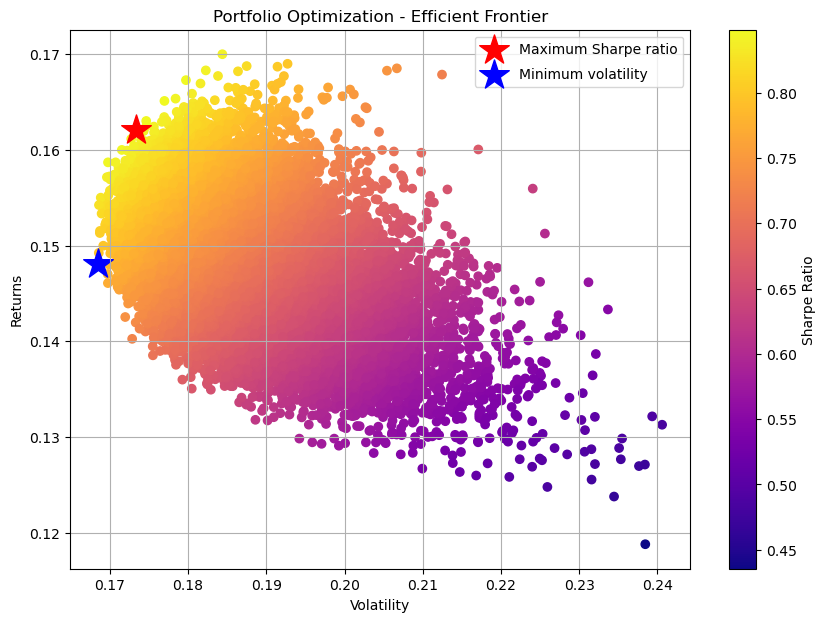

In [37]:
plt.figure(figsize=(10, 7))
plt.scatter(vol_store,returns_store,c=sharpe_store,cmap='plasma')
plt.colorbar(label='Sharpe Ratio')
plt.scatter(max_sharpe_vol,max_sharpe_return,marker='*',color='r',s=500, label='Maximum Sharpe ratio')
plt.scatter(min_vol_vol,min_vol_return,marker='*',color='b',s=500, label='Minimum volatility')
plt.title('Portfolio Optimization - Efficient Frontier')
plt.grid(True)
plt.xlabel('Volatility')
plt.ylabel('Returns')
plt.legend(labelspacing=0.8)
plt.show()